# A First Computational Fluid Dynamic Simulation

There are many parts to a CFD application.
* Know/Decide what mathematical system I want to solve, i.e. I want to define the mathematical equation I'm trying to approximate;
* Domain (a.k.a. grid): the area of space that we're solving the equations over (plus any boundary space, represented by ghost cells).

There's more, but let's start by examining those two.

We'll build a first application that calculates a wave propagating in a one dimensional domain. The basic system we will solve is what's called the 1-way (linear) wave equation, which has the basic features of flow/information propagation:

$\frac{\partial P}{\partial t} + c \frac{\partial P}{\partial x} = 0$

## Domain: the location of points that will be computed

We will define a grid of 5 evenly spaced points between $x_L=0$ and $x_R=5$ as an example.

In [113]:
xL   = 0
xR   = 5
npts = 5
nghost = 2

xL = 0
xR = 5
npts = 5
nghost = 2


We have to calculate some important properties:
* spacing between 2 points, $dx$: in the variable dx,
* position of each point, $x_i$: in the variable xi = [x_1, x_2, x_3, ... x_5].

In [114]:
dx  = (xR-xL)/npts
ind = 1-nghost:npts+nghost
xi = (ind-1)*dx+dx/2

dx = 1
ind =

  -1   0   1   2   3   4   5   6   7

xi =

 Columns 1 through 8:

  -1.5000  -0.5000   0.5000   1.5000   2.5000   3.5000   4.5000   5.5000

 Column 9:

   6.5000



Let's turn this process into a function that takes, as inputs:
* left domain boundary, xL
* right domain boundary, xR
* number of points, npts

and returns
* grid size, dx
* location of points, xi
* vector of indices

(This function is basically the ***mesher*** of a proper CFD package!)

In [115]:
function [dx,ind,xi] = grid(xL,xR,npts,nghost)
  dx  = (xR-xL)/npts;
  ind = 1-nghost:npts+nghost;
  xi  = (ind-1)*dx + dx/2;
end

[dx,ind,xi] = grid(0,5,5,2)

dx = 1
ind =

  -1   0   1   2   3   4   5   6   7

xi =

 Columns 1 through 8:

  -1.5000  -0.5000   0.5000   1.5000   2.5000   3.5000   4.5000   5.5000

 Column 9:

   6.5000



What are some of the other parts of a CFD application? Here's two more:
* Initial Condition
* Boundary Condition(s)

## Initial Conditions

Let's use a sine wave as our first try. 'P(x,t=0) = sin(x)'

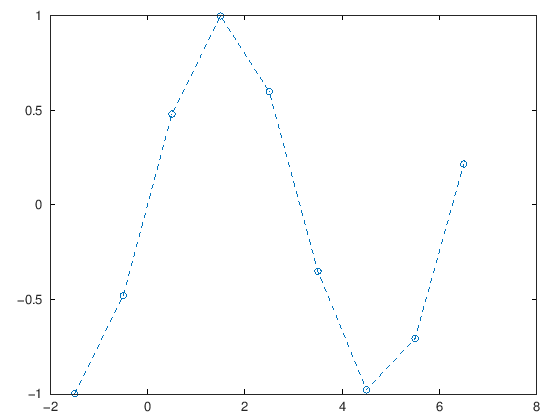

In [134]:
xL = 0; xR = 5; npts = 5; nghost = 2;
[dx,ind,xi] = grid(xL,xR,npts,nghost);  %Generate the discretization a.k.a. the grid
P0 = sin(xi);                  %Calculate the initial condition
plot(xi,P0,'o--')              %Plot the initial condition as a check

## Boundary Conditions

What happens at the boundary. We will use a periodic boundary for simplicity.

P1 =

 Columns 1 through 8:

        0        0   0.4794   0.9975   0.5985  -0.3508  -0.9775        0

 Column 9:

        0



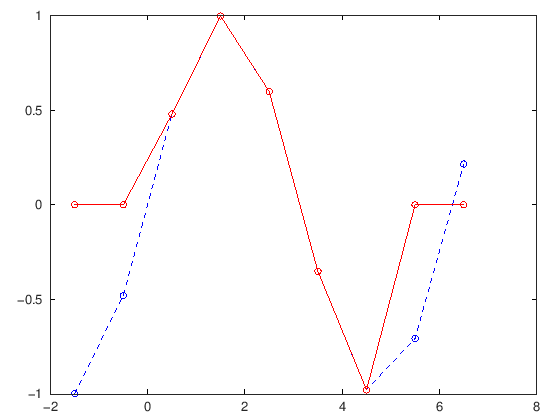

In [136]:
function [Pout] = update_boundary_condition(Pin,nghost,condition, value)
  Pout = Pin;
  switch (condition)
    case "periodic"
      for i = 1:nghost
        disp('periodic chosen')
      end
    case "constant"
      for i = 1:nghost
        Pout(i) = value;
        Pout(end-(i-1)) = value;
      end
    end
end

P1 = update_boundary_condition(P0,nghost,'constant',0)
plot(xi,P0,'o--b',xi,P1,'o-r')

## Time-update: marching forwards in time

How to compute the next time step based on the current value.

In [35]:
z = 2

z = 2


## Putting it all together: our first application

1. Define the problem parameters
2. Compute the grid
3. Compute initial condition
4. Apply boundary Conditions
5. March forward one step
6. Go back to step 4. 